<a href="https://colab.research.google.com/github/testanalyst/AILauchpad/blob/main/Assignment1_Day1_Supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy pandas scikit-learn matplotlib

In [2]:
# The dataset used is the Iris flower dataset, you can get it from kaggle, https://scikit-learn.org/, https://archive.ics.uci.edu and many other places
# I think in the original and raw data set that contains 150 rows, the column names are not given. In some datasets, the species column values itself
# seems missing. But this missing column/value is not universal.
import pandas as pd

# I chose to load the Iris dataset from https://archive.ics.uci.edu
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Adding column names as these are missing in the original dataset.
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris_sup_01 = pd.read_csv(url, header=None, names=column_names)

In [3]:
# Let's look into dataset using different functions as out of the box support by Pandas and or supporting libraries like tabulate
# pip install tabulate
# https://www.geeksforgeeks.org/how-to-print-an-entire-pandas-dataframe-in-python/
#iris_df_cp_spl.head()
#iris_df_cp_spl.tail()
print(iris_sup_01.to_markdown())

|     |   sepal_length |   sepal_width |   petal_length |   petal_width | species         |
|----:|---------------:|--------------:|---------------:|--------------:|:----------------|
|   0 |            5.1 |           3.5 |            1.4 |           0.2 | Iris-setosa     |
|   1 |            4.9 |           3   |            1.4 |           0.2 | Iris-setosa     |
|   2 |            4.7 |           3.2 |            1.3 |           0.2 | Iris-setosa     |
|   3 |            4.6 |           3.1 |            1.5 |           0.2 | Iris-setosa     |
|   4 |            5   |           3.6 |            1.4 |           0.2 | Iris-setosa     |
|   5 |            5.4 |           3.9 |            1.7 |           0.4 | Iris-setosa     |
|   6 |            4.6 |           3.4 |            1.4 |           0.3 | Iris-setosa     |
|   7 |            5   |           3.4 |            1.5 |           0.2 | Iris-setosa     |
|   8 |            4.4 |           2.9 |            1.4 |           0.2 | Iris-s

In [4]:
# I wanted to understand how does sepal_length, sepal_width, petal_length and petal_width decides the type of Iris flower
# This might take longer, so I am starting with EDA (Exploratory Data Analysis)
# As a tester I will ask myself, what did I learn from this?

iris_sup_01.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# One key learning after looking at data in its raw form as well as Statistics, some sort of visualization is needed.
# How do we choose the elements (features, labels) for visualization?
# For that Prinicpal Component Analysis (Appears to be a manifestation of Correlation Matrix) needs to be performed.
# ZoomIn-Zoomout
# The idea is that For future measurements of flowers we want to find a way to determine the species from the measurements.
# Ref: https://www.math.umd.edu/~petersd/666/html/iris_pca.html

# Encode the categorical variable (species)
from sklearn.preprocessing import LabelEncoder, StandardScaler

#iris_df_cp_spl.tail(51)
#iris_df_cp_spl.head(51)

# Create a boolean mask to identify the transitions
transition_mask = iris_sup_01['species'].shift() != iris_sup_01['species']

# Get the indices where transitions occur
transition_indices = iris_sup_01[transition_mask].index

# Create an empty DataFrame to store the selected rows
selected_rows = pd.DataFrame(columns=iris_sup_01.columns)

# Loop through transition indices and select rows before and after each transition
for idx in transition_indices:
    start_idx = max(0, idx - 1)
    end_idx = min(len(iris_sup_01), idx + 1)
    selected_rows = pd.concat([selected_rows, iris_sup_01.iloc[start_idx:end_idx]])

# Display the selected rows
print(selected_rows)

     sepal_length  sepal_width  petal_length  petal_width          species
0             5.1          3.5           1.4          0.2      Iris-setosa
49            5.0          3.3           1.4          0.2      Iris-setosa
50            7.0          3.2           4.7          1.4  Iris-versicolor
99            5.7          2.8           4.1          1.3  Iris-versicolor
100           6.3          3.3           6.0          2.5   Iris-virginica


<ipython-input-5-e8ba51d9dca1>:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  selected_rows = pd.concat([selected_rows, iris_sup_01.iloc[start_idx:end_idx]])


In [6]:
#Now encode
label_encoder = LabelEncoder()
iris_sup_01['species'] = label_encoder.fit_transform(iris_sup_01['species'])

# Recreate a boolean mask to identify the transitions
transition_mask = iris_sup_01['species'].shift() != iris_sup_01['species']

# Get the indices where transitions occur
transition_indices = iris_sup_01[transition_mask].index

# Create an empty DataFrame to store the selected rows
selected_rows = pd.DataFrame(columns=iris_sup_01.columns)

# Loop through transition indices and select rows before and after each transition
for idx in transition_indices:
    start_idx = max(0, idx - 1)
    end_idx = min(len(iris_sup_01), idx + 1)
    selected_rows = pd.concat([selected_rows, iris_sup_01.iloc[start_idx:end_idx]])

# Display the selected rows
print(selected_rows)

     sepal_length  sepal_width  petal_length  petal_width species
0             5.1          3.5           1.4          0.2       0
49            5.0          3.3           1.4          0.2       0
50            7.0          3.2           4.7          1.4       1
99            5.7          2.8           4.1          1.3       1
100           6.3          3.3           6.0          2.5       2


<ipython-input-6-e181fcce9cad>:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  selected_rows = pd.concat([selected_rows, iris_sup_01.iloc[start_idx:end_idx]])


In [7]:
correlation_matrix = iris_sup_01.corr()
print(correlation_matrix)

# This correlation matrix becomes another basis of identifying patterns

              sepal_length  sepal_width  petal_length  petal_width   species
sepal_length      1.000000    -0.109369      0.871754     0.817954  0.782561
sepal_width      -0.109369     1.000000     -0.420516    -0.356544 -0.419446
petal_length      0.871754    -0.420516      1.000000     0.962757  0.949043
petal_width       0.817954    -0.356544      0.962757     1.000000  0.956464
species           0.782561    -0.419446      0.949043     0.956464  1.000000


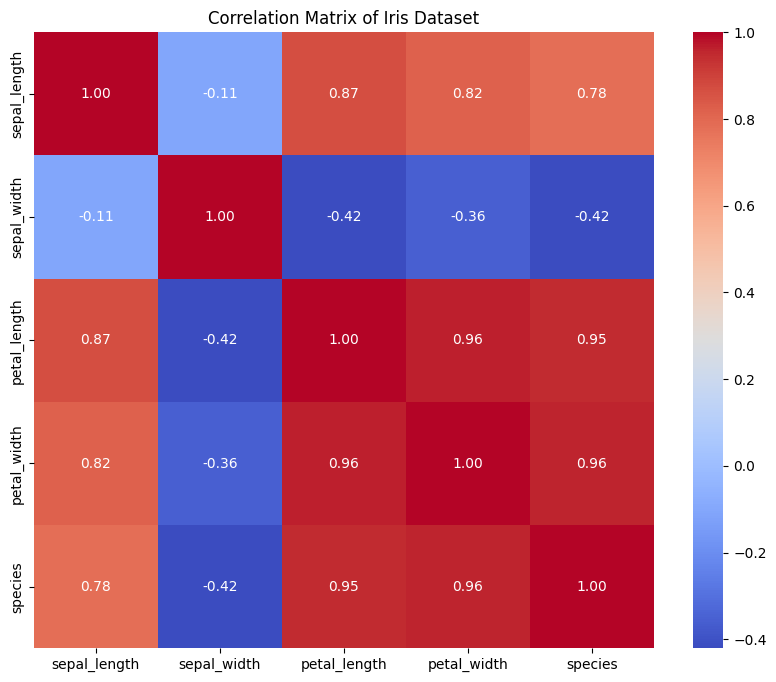

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Iris Dataset')
plt.show()

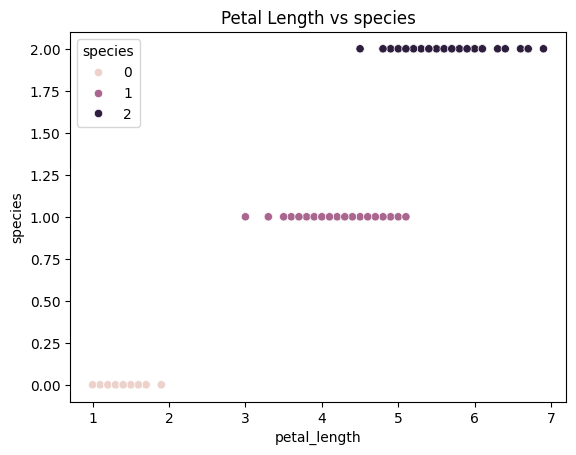

In [9]:
# Scatter plot for petal length vs species
# Based on the high correlations
sns.scatterplot(data=iris_sup_01, x="petal_length", y="species", hue="species")
plt.title("Petal Length vs species")
plt.show()

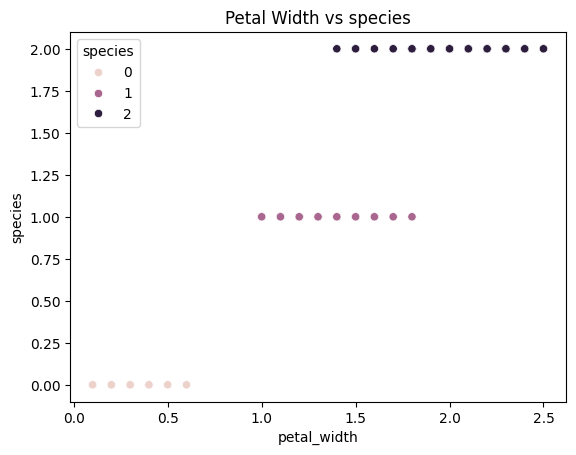

In [10]:
# Scatter plot for petal width vs species
# Based on the high correlations
sns.scatterplot(data=iris_sup_01, x="petal_width", y="species", hue="species")
plt.title("Petal Width vs species")
plt.show()

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [12]:
# Split the dataset into features and target
X = iris_sup_01.drop('species', axis=1)
y = iris_sup_01['species']


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# The dataset is now ready for training a model
print("Dataset preparation complete.")

Dataset preparation complete.


In [13]:
model_lr = LogisticRegression(max_iter=200)
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


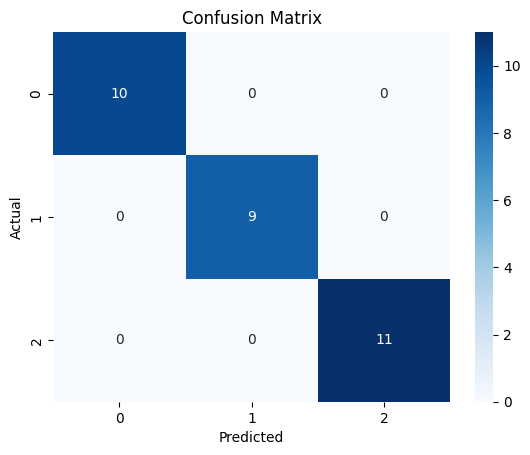

In [14]:
# Evaluating LogisticRegresion Algo based model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# Assuming y_pred_lr and y_test are defined
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')
cm = confusion_matrix(y_test, y_pred_lr)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Confusion Matrix plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Score and Curve (for binary classification)
if len(set(y_test)) == 2:
    y_prob = model_lr.predict_proba(X_test_scaled)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    print(f"ROC AUC Score: {roc_auc:.2f}")

    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

In [15]:
# Making predictions
y_pred = model_lr.predict(X_test)

# Printing the predicted prices
print("Predicted iris type:", y_pred_lr)
print("Actual iris type:", y_test.values)

# Later look at https://github.com/scikit-learn/scikit-learn/issues/28429

Predicted iris type: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Actual iris type: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [16]:
# Evaluating the model - piece by piece
mse = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0


In [17]:
# Evaluate the model - piece by piece
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [18]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred_lr))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [19]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model_lr, X_train_scaled, y_train, cv=5)

print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean():.2f}")

Cross-validation scores: [0.95833333 1.         0.875      1.         0.95833333]
Average cross-validation score: 0.96


In [20]:
# Decision Tree as an Algorithm
from sklearn import tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()

model_dt.fit(X_train_scaled, y_train)
y_pred_dt = model_dt.predict(X_test_scaled)

# Printing the predicted prices
print("Predicted iris type:", y_pred_dt)
print("Actual iris type:", y_test.values)

Predicted iris type: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Actual iris type: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [22]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0


In [23]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [24]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred_dt))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [25]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model_dt, X_train_scaled, y_train, cv=5)

print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean():.2f}")

Cross-validation scores: [1.         0.95833333 0.875      0.95833333 0.95833333]
Average cross-validation score: 0.95
